This is a quite an interesting multi-modal dataset, with already a large number of different pieces of data ready to go.

Option 1:

Work with freesurfer extracted ROI data in desikan + destr + subcort + wmparc as provided in:

`derivatives/fs_stats/data-*.tsv
                      data-cortical_type-aparc.a2009s_measure-*.tsv
                      data-cortical_type-aparc_measure-*.tsv
                      data-subcortical_type-aseg_measure-*.tsv
                      fata-subcortical_type-wmparc_measure-*.tsv`
                      
Option 2:

Work with the VBM standard space representation of the data - i.e., apply different templates.

Option 3:

Register freesurfer surface values into standard space, then work with those
(Look into using nypipe and hcp commands)

Option 4:

Work with standard space surface values from fmri task

Option 5:

Work with standard volumetric space values from fmri task

Option 6:

Work with dti data (already in standard space ???)



Useful for fmri options? Want regressors from fmri_prep + resp. ? 
'ds003097/derivatives/physiology/sub-0001/physio/sub-0001_task-moviewatching_recording-respcardiac_desc-retroicor_regressors.tsv'

In [1]:
import nibabel as nib
import os
from neurotools.plotting import plot
from neurotools.loading import load
from nibabel.freesurfer.io import read_geometry

data_dr = os.path.join(os.path.dirname(os.getcwd()), 'data', 'ds003097')

/home/sage/anaconda3/envs/bpt/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


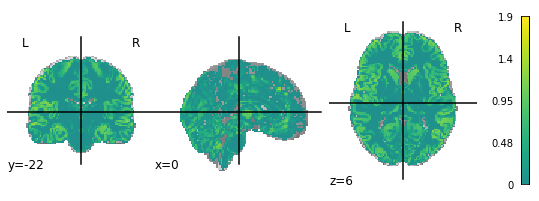

In [2]:
# Whats up with VBM?
vbm_vol_loc = os.path.join(data_dr, 'derivatives/vbm/sub-0001/sub-0001_desc-VBM_GMvolume.nii.gz')
vbm_vol = nib.load(vbm_vol_loc)
plot(vbm_vol, vol_plot_type='stat', threshold=.00001)

In [46]:
# Whats up with the freesurfer data?

# Optionally re-sample to average space, then work with
# file:///home/sage/Downloads/Resampling-FreeSurfer-HCP.pdf

data_dr = '/home/sage/methods_series/try/ds003097/'
fs_dr = os.path.join(data_dr, 'derivatives/freesurfer/sub-0001/surf')

sphere_coords, sphere_faces = read_geometry(os.path.join(fs_dr, 'lh.sphere'))
print(sphere_coords.shape), print(sphere_faces.shape)

thickness = load(os.path.join(fs_dr, 'lh.thickness'))
thickness.shape

(131504, 3)
(263004, 3)


(131504,)

In [62]:
frmi_prep_dr = os.path.join(data_dr, 'derivatives/fmriprep/sub-0001/func')
lh_loc = os.path.join(frmi_prep_dr, 'sub-0001_task-moviewatching_space-fsaverage5_hemi-L.func.gii')
lh = load(lh_loc)
lh.shape

(10242, 290)

(None, None)

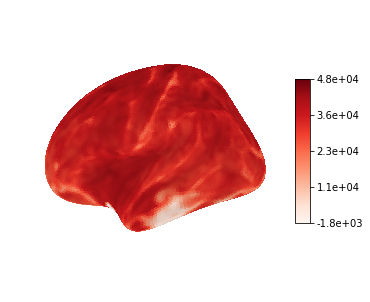

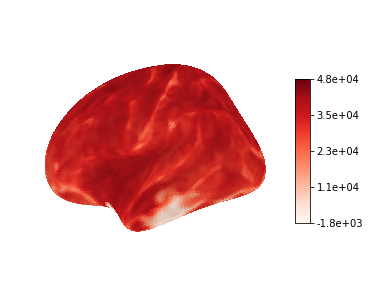

In [74]:
plot(lh[:, 0], threshold=None), plot(lh[:, 20], threshold=None)